In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
from scipy import signal

In [24]:
R1 = 26.8e3
R2 = 324.6
C1 = 22.56e-9
L1 = 10.45e-3

## Filtro Pasa Banda

In [25]:
f0 = 1/(2*np.pi*np.sqrt(L1*C1))
print("Frecuencia Central de la Banda de Paso (Hz):",f0)

Frecuencia Central de la Banda de Paso (Hz): 10365.552097770596


In [26]:
Q = (1/R2)*np.sqrt(L1/C1)
print("Factor de Calidad: ",Q)

Factor de Calidad:  2.096718282513401


In [27]:
f1 = (R2/(4*np.pi*L1))*(np.sqrt(1+4*Q*Q)-1)
print("Frecuencia de Corte Inferior (Hz):",f1)

Frecuencia de Corte Inferior (Hz): 8184.354276772263


In [28]:
f2 = (R2/(4*np.pi*L1))*(np.sqrt(1+4*Q*Q)+1)
print("Frecuencia de Corte Superior (Hz):", f2)

Frecuencia de Corte Superior (Hz): 13128.057102382716


### Datos Experimentales

- Frecuencia central: $f_0 = 10880 Hz$
- Frecuencia de corte inferior: $f_1 = 8185 Hz$
- Frecuencia de corte superior: $f_2 = 14700 Hz$

In [29]:
#f0
m_f0 = 20*np.log10(3.92/5.04) 
p_f0 = -0.390
#f1
m_f1 = 20*np.log10(2.88/5.04)
p_f1 = 44.7
#f1/2
m_f12 = 20*np.log10(1.12/4.96)
p_f12 = 78
#f1/10
m_f110 = 20*np.log10(0.24/4.96)
p_f110 = 87.7
#f2
m_f2 = 20*np.log10(2.80/5.04)
p_f2 = -43.4
#f2/2
m_f22 = 20*np.log10(1.04/5.04)
p_f22 = -74.3
#f2/10
m_f210 = 20*np.log10(0.156/5.04)
p_f210 = -88

mag = [m_f110, m_f12, m_f1, m_f0, m_f2, m_f22, m_f210]
phase = [p_f110, p_f12, p_f1, p_f0, p_f2, p_f22, p_f210]

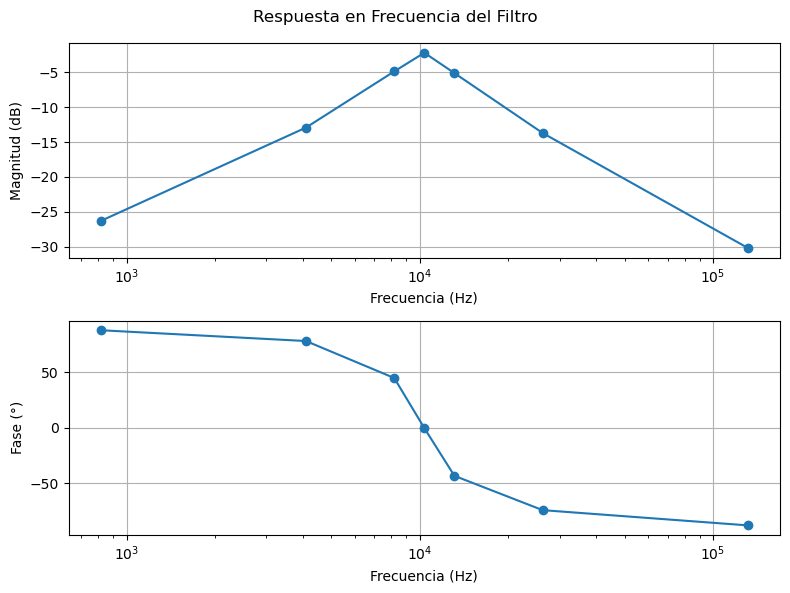

In [30]:
freq = [f1/10, f1/2, f1, f0, f2, f2*2, f2*10]
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(freq,mag, marker="o")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud (dB)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(freq,phase,marker="o")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Fase (°)")
axs[1].set_xscale("log")
axs[1].grid(True)
fig.suptitle("Respuesta en Frecuencia del Filtro")
plt.tight_layout()
plt.show()

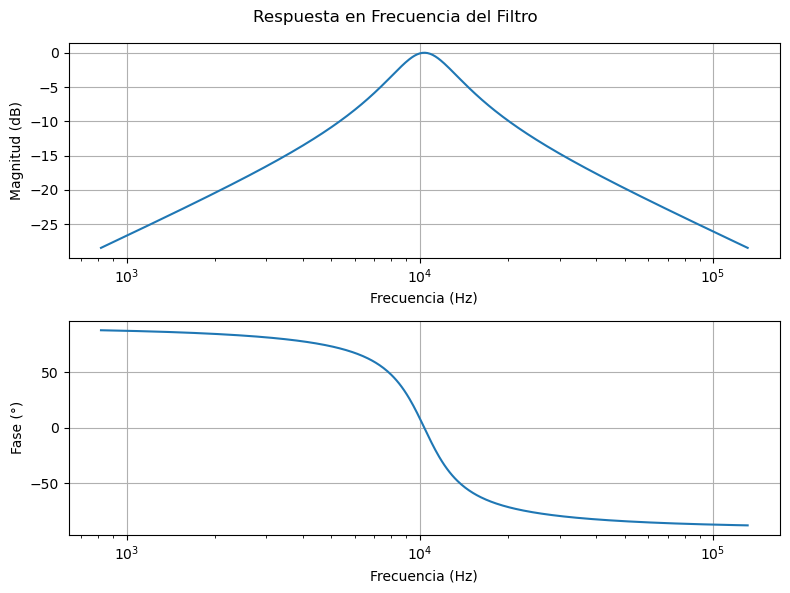

In [31]:
num = [(R2/L1), 0]
den = [1, (R2/L1), (1/(L1*C1))]
filtro_pasa_banda = signal.TransferFunction(num,den)
w = np.logspace(np.log10((f1*2*np.pi)/10), np.log10((2*f2*np.pi)*10), 500)
w, mag, phase = signal.bode(filtro_pasa_banda, w)
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(w/(2*np.pi), mag)
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud (dB)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(w/(2*np.pi), phase)
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Fase (°)")
axs[1].set_xscale("log")
axs[1].grid(True)
fig.suptitle("Respuesta en Frecuencia del Filtro")
plt.tight_layout()
plt.show()

## Filtro Pasa Alto

In [32]:
fc = 1/(2*np.pi*R1*C1)
freq = [fc/10, fc/2, fc, fc*2, fc*10]
print("Frecuencia de corte (Hz):",fc)

Frecuencia de corte (Hz): 263.236581540263


Frecuencia de Corte Experimental: $f_c = 263\,Hz$

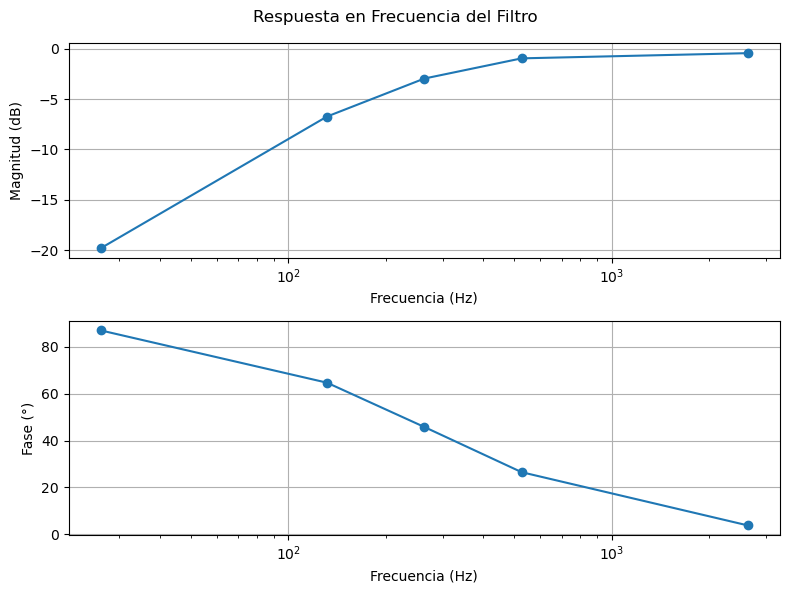

In [33]:
mag = [20*np.log10(0.312/3.04), 20*np.log10(1.40/3.04), 20*np.log10(2.16/3.04), 20*np.log10(2.72/3.04), 20*np.log10(3/3.16)]
phase = [87, 64.7, 45.8, 26.5, 3.8]
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(freq,mag, marker="o")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud (dB)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(freq,phase,marker="o")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Fase (°)")
axs[1].set_xscale("log")
axs[1].grid(True)
fig.suptitle("Respuesta en Frecuencia del Filtro")
plt.tight_layout()
plt.show()

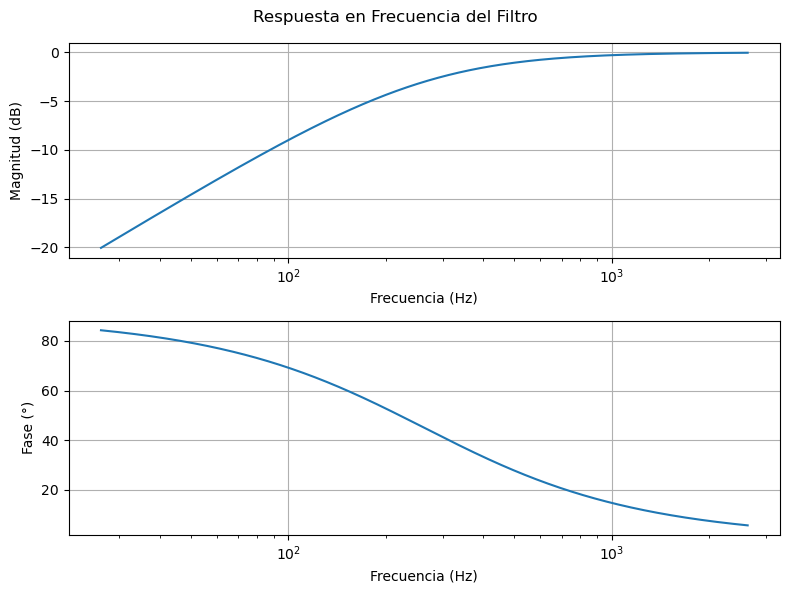

In [34]:
num = [1, 0]
den = [1, 1/(C1*R1)]
filtro_pasa_alto = signal.TransferFunction(num,den)
w = np.logspace(np.log10((fc*2*np.pi)/10), np.log10((2*fc*np.pi)*10), 500)
w, mag, phase = signal.bode(filtro_pasa_alto, w)
fig, axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(w/(2*np.pi), mag)
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud (dB)")
axs[0].set_xscale("log")
axs[0].grid(True)
axs[1].plot(w/(2*np.pi), phase)
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Fase (°)")
axs[1].set_xscale("log")
axs[1].grid(True)
fig.suptitle("Respuesta en Frecuencia del Filtro")
plt.tight_layout()
plt.show()

## Gráficas de Señales de Entrada y Salida del Filtro Pasabanda

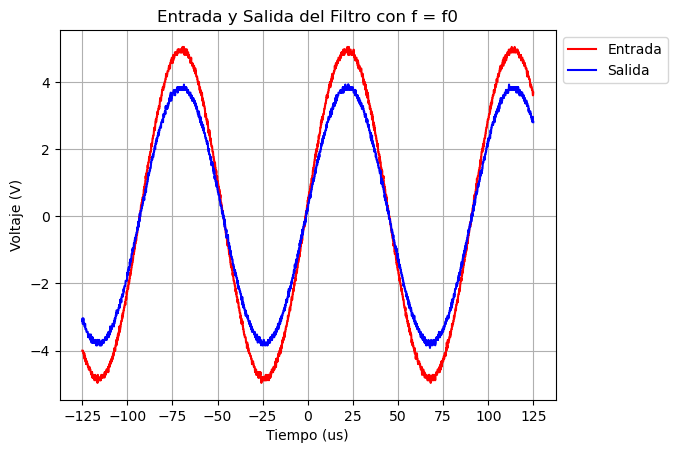

In [35]:
# Entrada y Salida a f=f0
data0 = pd.read_csv("ALL0002/F0002CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0002/F0002CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f0")
plt.grid(True)
plt.show()

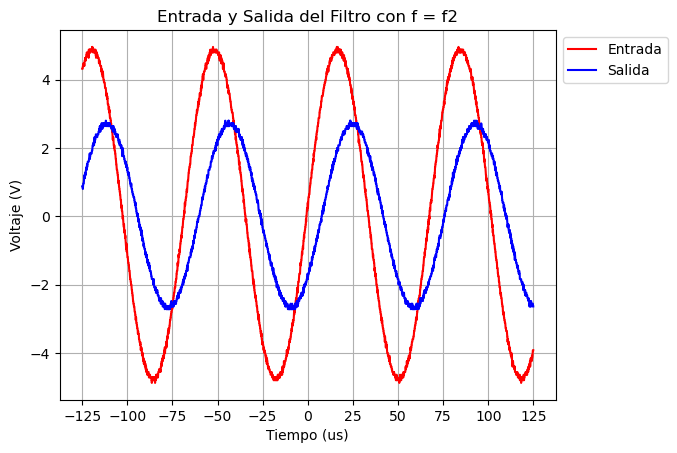

In [36]:
# Entrada y Salida a f=f2
data0 = pd.read_csv("ALL0001/F0001CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0001/F0001CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f2")
plt.grid(True)
plt.show()

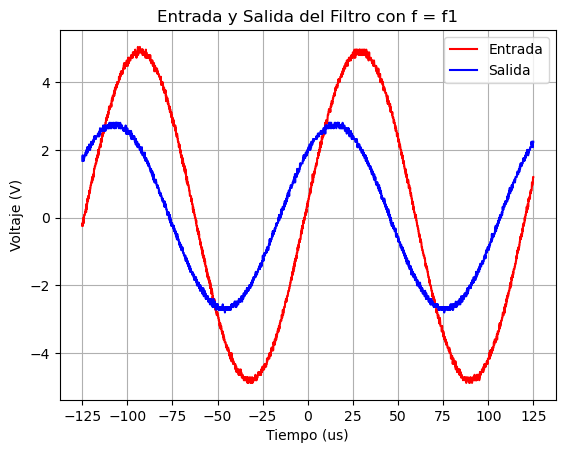

In [37]:
# Entrada y Salida a f=f1
data0 = pd.read_csv("ALL0003/F0003CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0003/F0003CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f1")
plt.grid(True)
plt.show()

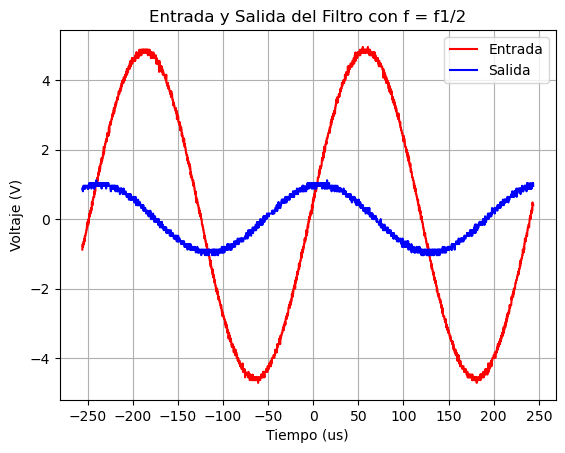

In [38]:
# Entrada y Salida a f=f1/2
data0 = pd.read_csv("ALL0004/F0004CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0004/F0004CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f1/2")
plt.grid(True)
plt.show()

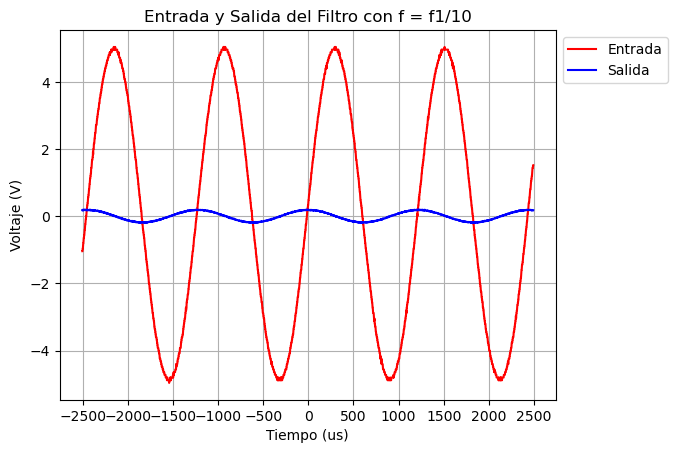

In [39]:
# Entrada y Salida a f=f1/10
data0 = pd.read_csv("ALL0005/F0005CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0005/F0005CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(500))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f1/10")
plt.grid(True)
plt.show()

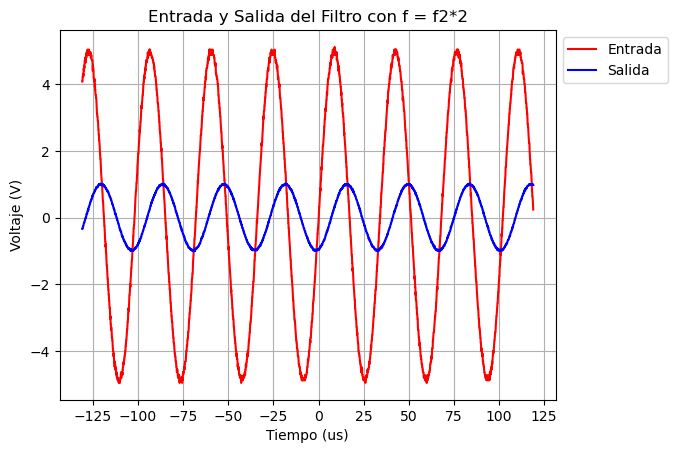

In [40]:
# Entrada y Salida a f=f2*2
data0 = pd.read_csv("ALL0007/F0007CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0007/F0007CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f2*2")
plt.grid(True)
plt.show()

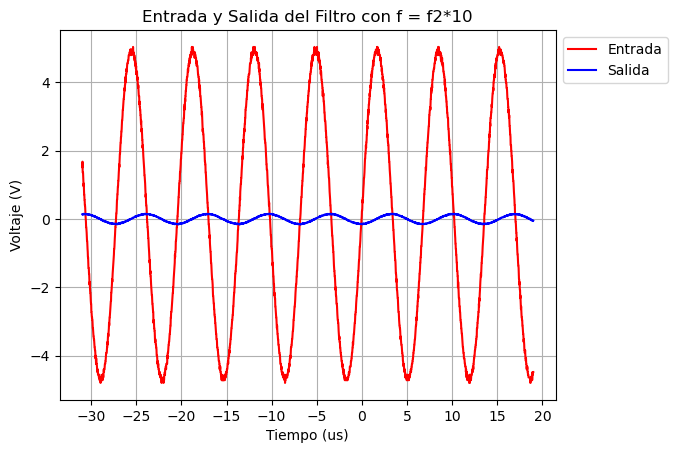

In [41]:
# Entrada y Salida a f=f2*10
data0 = pd.read_csv("ALL0008/F0008CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0008/F0008CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = f2*10")
plt.grid(True)
plt.show()

## Gráficas de Señales de Entrada y Salida para el Filtro Pasa Alto

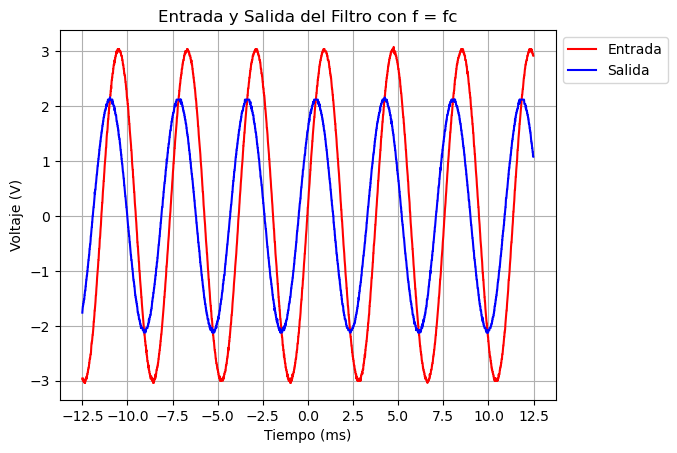

In [42]:
# Entrada y Salida a f=fc
data0 = pd.read_csv("ALL0009/F0009CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0009/F0009CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(2.5))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = fc")
plt.grid(True)
plt.show()

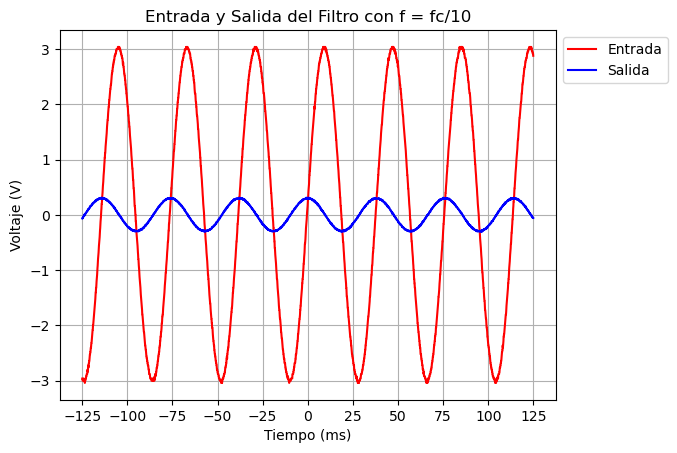

In [43]:
# Entrada y Salida a f=fc/10
data0 = pd.read_csv("ALL0010/F0010CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0010/F0010CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = fc/10")
plt.grid(True)
plt.show()

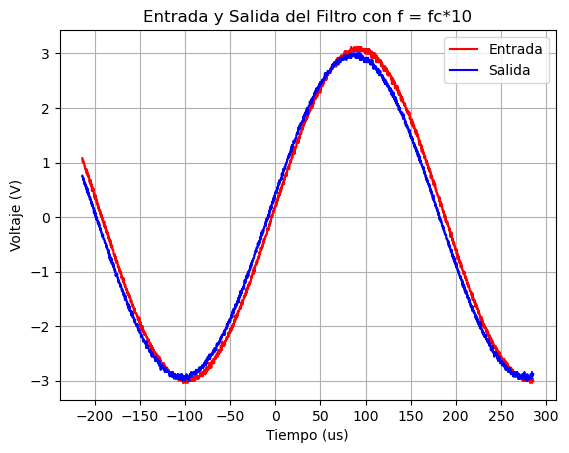

In [44]:
# Entrada y Salida a f=fc*10
data0 = pd.read_csv("ALL0011/F0011CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0011/F0011CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(50))
plt.xlabel("Tiempo (us)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = fc*10")
plt.grid(True)
plt.show()

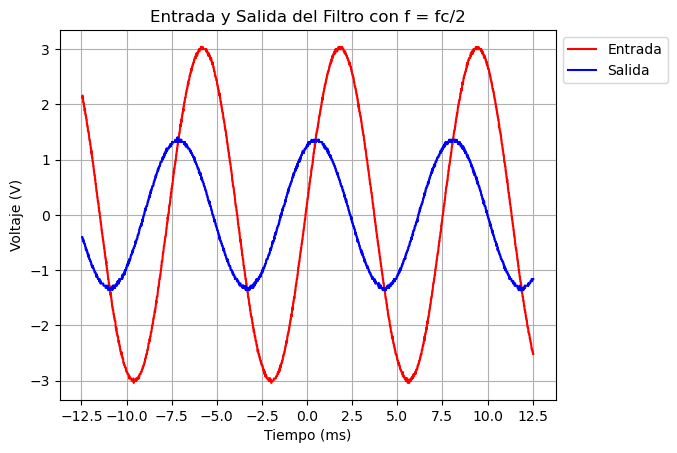

In [45]:
# Entrada y Salida a f=fc/2
data0 = pd.read_csv("ALL0012/F0012CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0012/F0012CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(2.5))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = fc/2")
plt.grid(True)
plt.show()

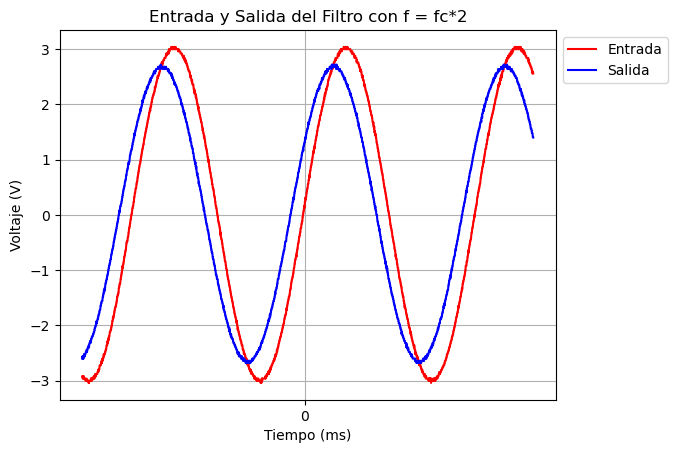

In [46]:
# Entrada y Salida a f=fc*2
data0 = pd.read_csv("ALL0014/F0014CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0014/F0014CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1],color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Entrada y Salida del Filtro con f = fc*2")
plt.grid(True)
plt.show()

### Filtro Derivando un Seno en un Coseno

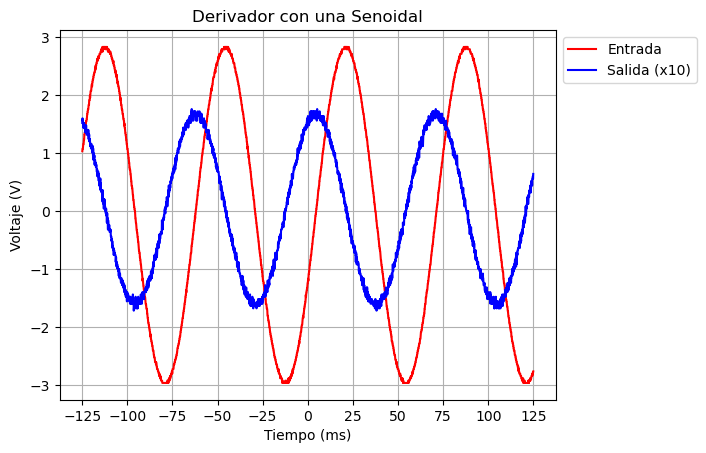

In [47]:
data0 = pd.read_csv("ALL0015/F0015CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0015/F0015CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1]-np.mean(data0.iloc[:,1]),color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1]*10,color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(25))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida (x10)"],bbox_to_anchor=(1,1))
plt.title("Derivador con una Senoidal")
plt.grid(True)
plt.show()

### Filtro Derivando una Cuadrada

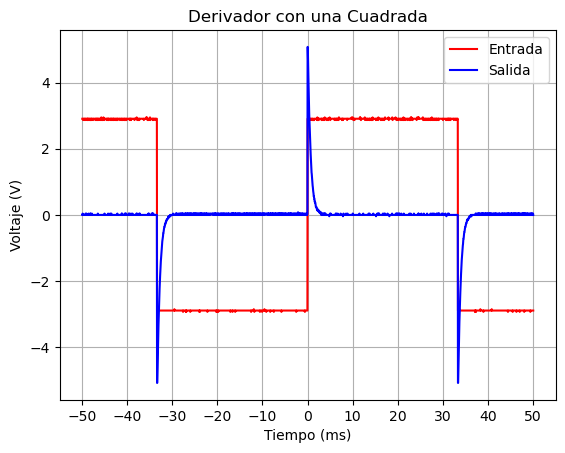

In [48]:
data0 = pd.read_csv("ALL0016/F0016CH1.CSV", usecols=[3,4])
data1 = pd.read_csv("ALL0016/F0016CH2.CSV", usecols=[3,4])
plt.plot(data0.iloc[:,0]*1000, data0.iloc[:,1]-np.mean(data0.iloc[:,1]),color="red")
plt.plot(data1.iloc[:,0]*1000, data1.iloc[:,1],color="blue")
plt.gca().xaxis.set_major_locator(MultipleLocator(10))
plt.xlabel("Tiempo (ms)")
plt.ylabel("Voltaje (V)")
plt.legend(["Entrada","Salida"],bbox_to_anchor=(1,1))
plt.title("Derivador con una Cuadrada")
plt.grid(True)
plt.show()